In [1]:
# by Joh Schoeneberg 2018
# BSD 3-clause licence

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

import math

#import cv2
import pims
from PIL import Image

import skimage

import json


import pylattice

import pylattice.functions.InputProcessing as inproc
import pylattice.functions.TiffProcessing as tiffproc


import os
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()

# read input data

In [2]:
path = '/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/'
inputParameters = pd.read_csv(path+'_inputParameters.csv',names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")

trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")
trackingCsvFilenameProcessed = inproc.getInputParameter(inputParameters,"trackingCsvFilenameProcessed")

slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))



In [5]:
filepath = path+'/'+outputDataFolder+'/'+master_outputDataFolder+'/puncta_01.csv'
detection_data = pd.read_csv(filepath,header=0)
detection_data.columns = ["x","y","z","A"]
print(len(detection_data))
detection_data[0:5]

168


,x,y,z,A
0,41.84319,97.23882,2.734540,15185.190
1,88.67713,91.22092,3.158334,30282.550
2,84.49375,52.26753,4.109425,15709.080
3,86.42184,97.71952,3.375700,21657.920
4,89.25303,35.40831,5.080955,9751.059


# plot detected puncta

Text(0.5,0,'Z axis')

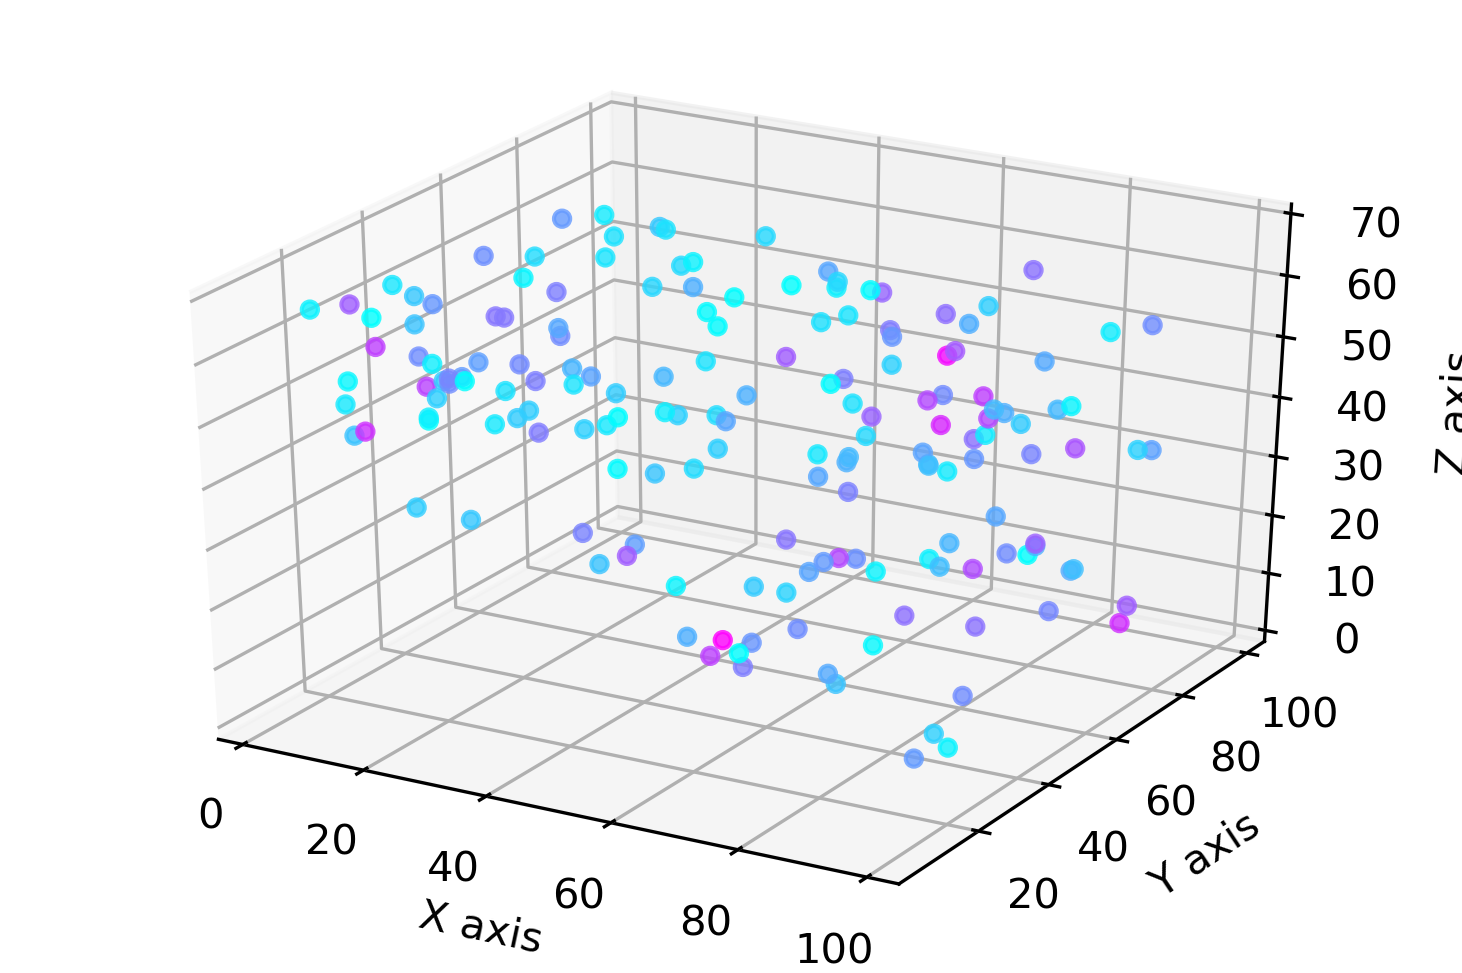

In [17]:
plt.figure(dpi=300)
ax = plt.axes(projection='3d')
x = detection_data['x'].values[0:100000]
y = detection_data['y'].values[0:100000]
z = detection_data['z'].values[0:100000]
intensity = detection_data['A'].values[0:100000]
ax.scatter3D(x, y, z, c=np.log(intensity), cmap='cool',alpha=0.8,s=15);
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

Text(0,0.5,'z')

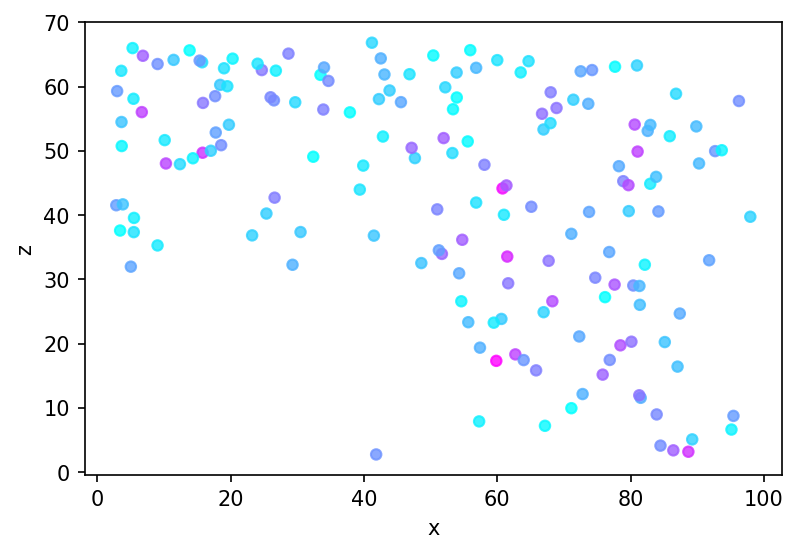

In [20]:
plt.figure(dpi=150)
ax = plt.axes()
x = detection_data['x']
y = detection_data['y']
z = detection_data['z']
intensity = detection_data['A']
ax.scatter(x, z, c=np.log(intensity), cmap='cool',alpha=0.8,s=25);
ax.set_xlabel("x")
ax.set_ylabel("z")

Text(0,0.5,'y')

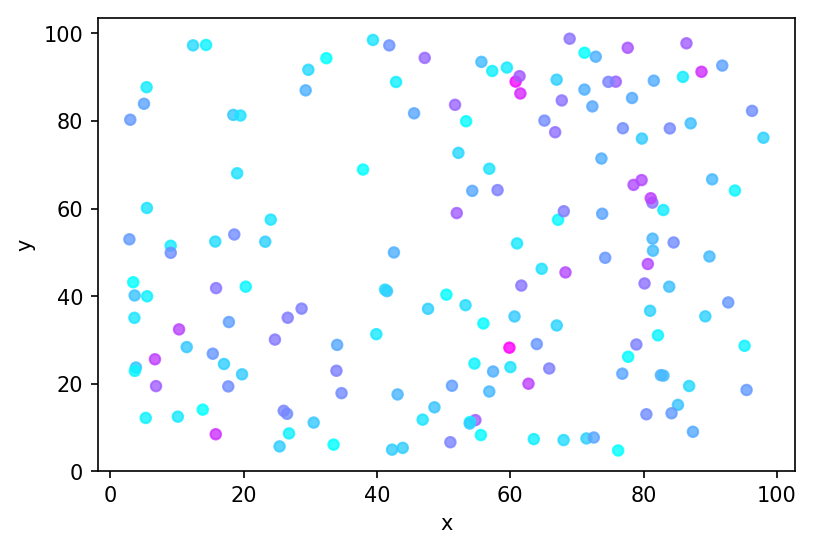

In [21]:
plt.figure(dpi=150)
ax = plt.axes()
ax.scatter(x, y, c=np.log(intensity), cmap='cool',alpha=0.8,s=25);
ax.set_xlabel("x")
ax.set_ylabel("y")

# Plot detection intensity Histogram and plot puncta dependent on their intensity

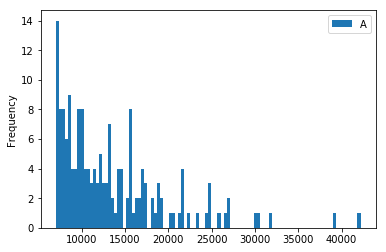

In [11]:
detection_data[['A']].plot.hist(bins=100)

# Display only the brighest detections

22/168 selected/total numbe of detections


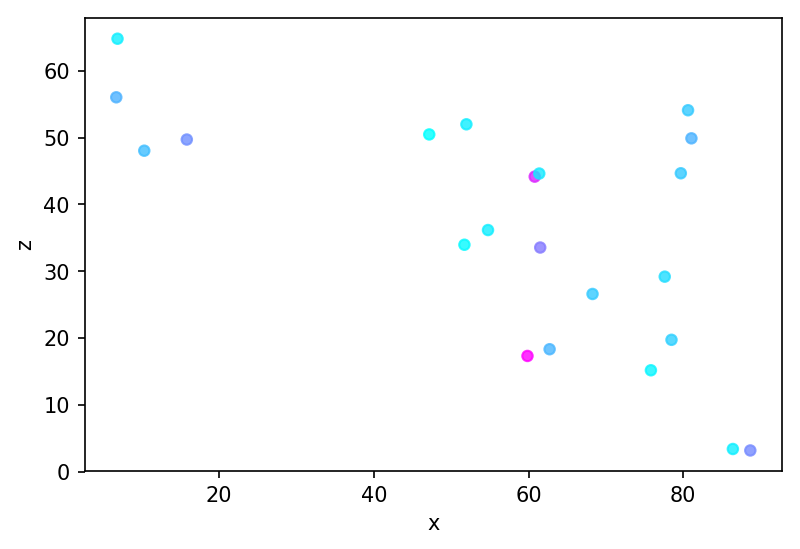

In [22]:
#%matplotlib notebook

idx = detection_data.index[detection_data['A'] > 20000];
print('{}/{} selected/total numbe of detections'.format(len(idx),len(detection_data)));

plt.figure(dpi=150)
ax = plt.axes()
x = ((detection_data['x']).loc[idx]);
y = ((detection_data['y']).loc[idx]);
z = ((detection_data['z']).loc[idx]);
intensity = ((detection_data['A']).loc[idx])
ax.scatter(x, z, c=intensity, cmap='cool',alpha=0.8,s=25);
ax.set_xlabel("x");
ax.set_ylabel("z");


